In [ ]:
# Import the Basic Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Import tensorflow and related libraries
import tensorflow as tf
print("Tensorflow-version:", tf.__version__)
from tensorflow import keras

from tensorflow.keras.applications import inception_v3
from tensorflow.keras.applications.inception_v3 import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, BatchNormalization
from tensorflow.keras.layers import Flatten, MaxPool2D, Dropout

from tensorflow.keras.models import Model, load_model

from tensorflow.keras.optimizers import Adam

# Import the metrics package for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing Package to display the image
import cv2
from google.colab.patches import cv2_imshow

# Import Packages to connect to Google Drive
from google.colab import drive

Tensorflow-version: 2.8.0


In [ ]:
# The dataset is stored in Google Drive
drive.mount("/content/drive/")
os.getcwd()
os.chdir("/content/drive/My Drive/Food-11 image dataset/")
path = "/content/drive/My Drive/Food-11 image dataset/"


Mounted at /content/drive/


In [ ]:
ft_inception_model = load_model("/content/drive/MyDrive/Food-11 image dataset/MODEL_INCEPTION-V3_FT-09-0.91.hdf5")

In [ ]:
labels = {0: 'Bread', 1: 'Dairy product', 2: 'Dessert', 3:'Egg', 4: 'Fried food', 5:'Meat',6:'Noodles-Pasta',7:'Rice', 8:'Seafood',9:'Soup',10: 'Vegetable-Fruit'}

In [ ]:
import PIL
prediction = []
original = []
image = []
count = 0
for i in os.listdir('/content/drive/MyDrive/Food-11 image dataset/evaluation'):
  for item in os.listdir(os.path.join('/content/drive/MyDrive/Food-11 image dataset/evaluation',i)):
    #code to open the image
    img= PIL.Image.open(os.path.join('/content/drive/MyDrive/Food-11 image dataset/evaluation',i,item))
    #resizing the image to (256,256)
    img = img.resize((299,299))
    #appending image to the image list
    image.append(img)
    #converting image to array
    img = np.asarray(img, dtype= np.float32)
    #normalizing the image
    img = img / 299
    #reshaping the image in to a 4D array
    img = img.reshape(-1,299,299,3)
    #making prediction of the model
    predict = ft_inception_model.predict(img)
    #getting the index corresponding to the highest value in the prediction
    predict = np.argmax(predict)
    #appending the predicted class to the list
    prediction.append(labels[predict])
    #appending original class to the list
    original.append(i)

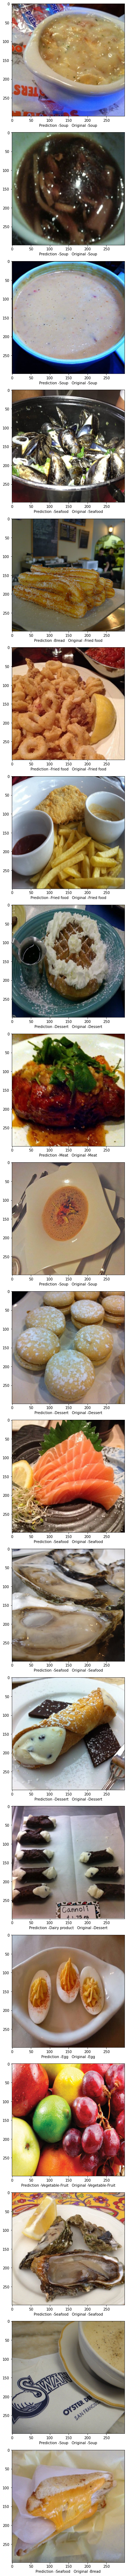

In [ ]:
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20,1,i+1)
    plt.xlabel("Prediction -" + prediction[j] +"   Original -" + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

In [ ]:
def predict_image(pathh):
  img = image.load_img(pathh, target_size=(299, 299))
  img_array = image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)
  img_preprocessed = inception_v3.preprocess_input(img_batch)
  prediction = ft_inception_model.predict(img_preprocessed)
  return labels[np.argmax(prediction)]

In [ ]:
os.getcwd()
os.chdir("/content/drive/My Drive/Food-11 image dataset/")
target_labels = ["Bread", 
                 "Dairy product", 
                 "Dessert", 
                 "Egg", 
                 "Fried food", 
                 "Meat", 
                 "Noodles-Pasta", 
                 "Rice", 
                 "Seafood", 
                 "Soup", 
                 "Vegetable-Fruit"]
path = "/content/drive/My Drive/Food-11 image dataset/"

Prediction :  Bread


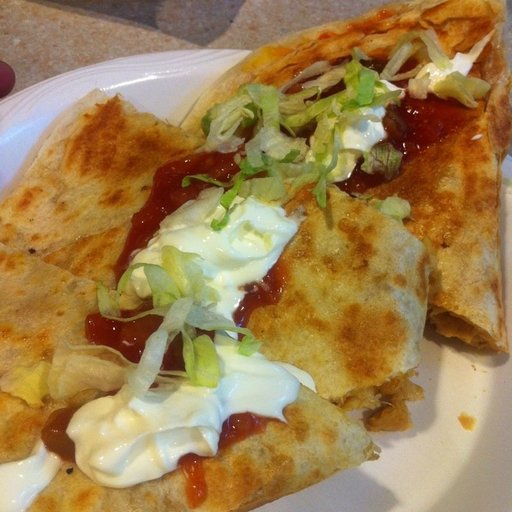

In [ ]:
from keras.applications import inception_v3
from keras.preprocessing import image
file = "/content/drive/MyDrive/Food-11 image dataset/evaluation/Bread/95.jpg"
img = cv2.imread(file)
print("Prediction : ",predict_image(file))
cv2_imshow(img)